<a href="https://colab.research.google.com/github/dmitriygorlov/Yandex.Practikum_Data_Science/blob/main/Module-01_02-Exploratory-data-analysis/project-2_research-of-apartments-for-sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир

Нужно научиться определять рыночную стоимость объектов недвижимости.  

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

План исследования:
1. Первичное знакомство с данными (корректное прочтение и проверить на дубликаты)
2. Предобработка данных (убрать или заполнить пустые значения, а также изменить тип данных при необходимости)
3. Добавление нужных столбцов с данными
4. Построение графиков, сравнений и доп вычислений по инструкции
5. Общий вывод по полученной информации

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [17]:
import pandas as pd
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')
data.info()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

Комментарий: из первичных данных видим, что разделитель нестандартный и нужно импортировать данные по другому с разделителем "\t". Также видно, что разделитель в числах - это точка, пропишем и её

In [18]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t', decimal = '.')
data.info()
print(data.head())

data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

0

<b>Вывод шаг 1</b> В нашем наборе данных есть только 22 переменных и только 8 из них без пропусков:
total_images, last_price, total_area, first_day_exposition, rooms, floor, studio, open_plan
Также есть "почти" заполненные столбцы с минимом пустых значений:
floors_total, locality_name. Также есть с элементами со значениями около 20 000:
living_area, kitchen_area, days_exposition; а также с 18 000 значениями: 
airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000. Еще есть половина значений: 
ceiling_height, balcony; 8500 значений в 
parks_nearest, ponds_nearest. 
И последний стобец is_apartment всего лишь с 2700 заполненных значений.

Из примечательного: в данных есть столбец is_apartment с типом 'object', хотя похож в смысловом значении на булев. Множество столбцов с типом 'float64', хотя по смыслу они целочисленные. Также по переменным есть дата в first_day_exposition с типом 'object'.

Дубликатов не обнаружено!

### Шаг 2. Предобработка данных

Для начала разберемся с пустыми значениями в переменных, для этого пройдёмся от наиболее пустых столбцов к более заполненным.

In [19]:
# data['is_apartment'].value_counts() 
# Это точно должна быть булева переменная, нам нужно заполнить пробелы ложью и поменять тип
data['is_apartment'].fillna(False, inplace=True)


# print(data[data['parks_nearest'].isnull()].head())
# print(data[data['ponds_nearest'].isnull()].head())
# парки и водоёмы с пустым значением лишь говорят, что рядом их нет (совпадение со значением ponds_around3000 и parks_around3000), заполняем нулями их и столбцы ponds_around3000 и parks_around3000
data['ponds_nearest'].fillna(0, inplace = True)
data['parks_nearest'].fillna(0, inplace = True)
data['ponds_around3000'].fillna(0, inplace = True)
data['parks_around3000'].fillna(0, inplace = True)


# print(data[data['airports_nearest'].isnull()].head())
# print(data[data['cityCenters_nearest'].isnull()].head())
# Отсутствие данных в столбцах скорее всего предполагает невозможность померять расстояние (слишком далеко), учтём их как нули, но при необходимости подсчёта будем их игнорировать.
data['airports_nearest'].fillna(0, inplace = True)
data['cityCenters_nearest'].fillna(0, inplace = True)

# print(data[data['balcony'].isnull()].head())
# пропуск в балконах скорее всего предполагает его отсутствие. Проставим нули в пустых значениях
data['balcony'].fillna(0, inplace = True)
# data['balcony'].isnull().sum()

# print(data[data['ceiling_height'].isnull()].head())
# data['ceiling_height'].value_counts()
# проверили, что потолок бывает разной высоты и тяжело его логически заменить. Оставим пустыми, чтобы не плодить медианы/средние и не сбить вывод по ним.

# print(data['days_exposition'].isnull().sum()) 
# print(data[data['days_exposition'].isnull()].head())
# print(data[data['days_exposition'] == 0].head())
# Кажется, что отсутствие значения говорит о том, что объявения сняли в тот же день. Заменим нулём, но проверим при расчётах отдельно!
data['days_exposition'].fillna(0, inplace = True)
# print(data['days_exposition'].isnull().sum())
# print(data[data['days_exposition'].isnull()].head())
# print(data[data['days_exposition'] == 0].head())

# print(data[data['living_area'].isnull()].head())
# print(data[data['kitchen_area'].isnull()].head())
# data['living_area'].value_counts()
# data['kitchen_area'].value_counts()
# проверили, что жилая площадь и площадь кухни бывают разной величины и тяжело их логически заменить. Оставим пустыми, чтобы не плодить медианы/средние и не сбить вывод по ним.

# print(data[data['floors_total'].isnull()].head())
# data['floors_total'].value_counts()
# данные по общему количеству этажей весьма разнятся с этажом квартиры, поэтому не можем заменить на среднее/медиану или на сам этаж. Поставим ноль для дальнейшей фильтрации
data['floors_total'].fillna(0, inplace = True)


# print(data[data['locality_name'].isnull()].head())
# data['locality_name'].value_counts()
# замена в столбце название населенного пункта не нужна ввиду разности значений (есть не только Санкт-петербург и большие поселения, но и много маеньких)


Заменили все возможные пропуски на подходящие значения, некоторы показатели были оставлены для того, чтобы не испортить дальнейшие подсчеты корреляций (отфильтровывая их)

Теперь изменем типы данных для лучшего сравнения и использования. Вначале размеремся с временным столбцом и булевым, далее изменим переменные с плавающей запятой 'float64' на целочисленные 'int64'

In [20]:
# Напоминаем себе столбцы и их значения
# print(data.head())

# Меняем дату
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format= '%Y-%m-%dT%H:%M:%S')
# data['first_day_exposition'].dtype()

# мендяем Аппартаменты на булев
data['is_apartment'] = data['is_apartment'].astype('bool')
# data['is_apartment'].dtype

# Меняем цену на целое (округление не важно)
data['last_price'] = data['last_price'].astype('int')

# Меняем общее число этажей на целое (количество в целых)
data['floors_total'] = data['floors_total'].astype('int')

#Меняем число балконов (количество в целых)
data['balcony'] = data['balcony'].astype('int')

# Меняем все расстояния до ближайшего (точность не важна) на целое
data['airports_nearest'] = data['airports_nearest'].astype('int')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')
data['parks_nearest'] = data['parks_nearest'].astype('int')
data['ponds_nearest'] = data['ponds_nearest'].astype('int')

# Меняем число парков и водоемов в 3км на целое (количество в целых)
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

# Меняем кол-во дней на целое (дни в целых)
data['days_exposition'] = data['days_exposition'].astype('int')

# проверяем что прошлись по всем
# print(data.head())

Заменили столбец даты и сделали булевым про аппартаменты, по остальным значениям также прошлись для превращения в целочисленные.

В целом обработка закончена и можем переходить к дальнейшим расчётам

<b>Вывод шаг 2</b> По возможности заменили пустые значения и типы переменных. В некоторых оставили пометку по учету при выявлении зависимостей

### Шаг 3. Посчитайте и добавьте в таблицу

In [21]:
# Добавляем столец с ценой за м2
data['price_m2'] = data['last_price']/data['total_area']

# Добавляем день, месяц и год публикации
data['day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).day
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

# Функция для определения "категории" этажа
def flooring(row):
    floor_max = row['floors_total']
    floor_now = row['floor']
    if floor_now == 1:
        return 'первый'
    elif floor_now == floor_max:
        return 'последний'
    elif floor_max == 0:
        return 'ошибка' # до этого ставили ноль там, где неопределено, таким образом уберём эти данные
    else:
        return 'другой'
        
data['what_floor'] = data.apply(flooring, axis = 1)
# data['what_floor'].value_counts()

# считаем доли жилой и кухонной зоны, отсутствующие значения просто не посчитаются
data['living_in_total_area'] = data['living_area'] / data['total_area']
data['kitchen_in_total_area'] = data['kitchen_area'] / data['total_area']

# Проверяем, что все добавлено
# print(data.head())


<b>Вывод шаг 3</b> Добавили новые столбцы: цена за м2; день, месяц, год размещения объявления; категоризация этажей; доли жилой и кухонной площадей, переходим к исследованию по инструкции

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучите площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


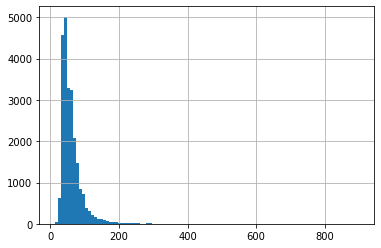

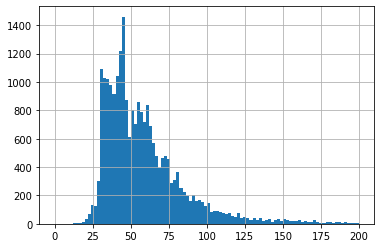

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


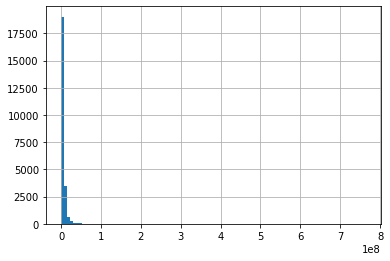

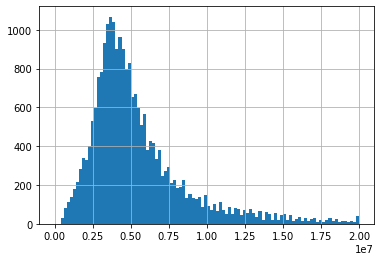

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


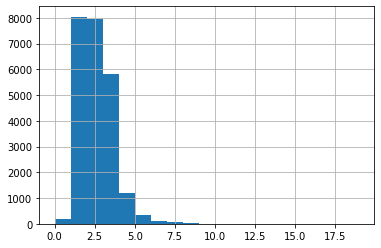

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


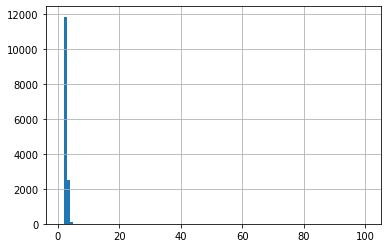

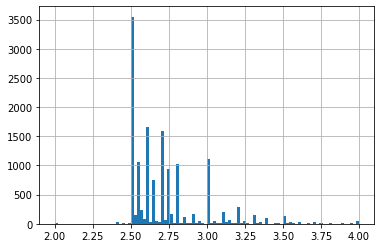

In [22]:
import matplotlib.pyplot as plt


# print(data.head())

print(data['total_area'].describe())
# среднее выше ммедианы, что говорит о большом выбросе наверх, что подтверждается слишком большим максимумом при малых квартилях, построим гистограмму, чтобы оценить распределение
data['total_area'].hist(bins=100)
plt.show()
# заметно, что выше 200 почти нет данных, построим без выброса вверх (вниз данные почти "чистые")
data['total_area'].hist(bins=100, range=(0,200))
plt.show()
# Распределение нормальное, по распределению видно, что есть пики предложений на 30 метрах, на 40 и на 60, предположительно это типовые проекты квартир

print(data['last_price'].describe())
# Среднее гораздо больше медианы (почти равно 3 квартилю), минимум и максимум отличаются на порядок (при этом межвартильный размах в рамках миллионов, построим гистограмму для оценки
data['last_price'].hist(bins=100)
plt.show()
# Построим более подробный отчёт до 20 миллионов
data['last_price'].hist(bins=100, range=(0,20000000))
plt.show()
# Распределение нормальное, пики кроме медианного особо не заметны

print(data['rooms'].describe())
# Показатель представляет из себя малый набор вариантов, поэтому ожидаемо средняя и медиана практически равны, хотя есть и большой максимум, построим гистограму
data['rooms'].hist(bins=19) # малый максимум поможет ровно построить гистограмму
plt.show()
# Как и ожидалось однкомнатных квартир больше всего, за ними близко 2-комнатные, на четверть меньше 3-комнатные и дальше уже гораздо меньше квартир.

print(data['ceiling_height'].describe())
# Средняя высота потолков чуть выше медианы, в целом большая часть объектов кажется нормальной, но смущает потолок в метр высотой и 100 метров, построим гистограму сразу до 5 метров
data['ceiling_height'].hist(bins=100)
plt.show()
# Ожилаемо такой график непонятен, перестроим с более ожидающимися парметрами от 2 метров до 4
data['ceiling_height'].hist(bins=100, range=(2,4))
plt.show()
# По данным ярко вино, что высота - это стандартизированная (возможно ГОСТом) переменная, поэтому в ней есть определенные всплески, без "мягкого" перетекания


- Площадь в квартирах - это поддащюаяся нормальному распределению величина с определенными пиками (судя по всему стандарты соответствия). Медианная площадь равна 52 метрам, средняя чуть выше медианы (60), при этом есть очень большие предложения (900 метров) и крохотные (больше 12 метров).
- Цена - это наиболее "нормальная" переменная из рассматриваемых, хоть в ней есть большие выбросы (самая дешевая квартира дешевле на 2 порядка, а самая дорогая на 2 порядка выше). Медиана стоимости - это 4,6 миллиона, средняя сильно выше - 6,5 миллионов (почти как третий квартиль).
- Комнаты - это переменная с достаточно малым набором вариантов и логичным распредлением: больше всего однокомнатых квартир и чуть меньше 2-комнатных 3-комнатных на четверть меньше и дальше уже совсем мало вариантов. Медианное значение 2 комнаты, средняя почти такая же.
- Высота потолков - это весьма стандартизированная переменная с пиками в конкретных значенениях (стандартах) с провалами между ними. Средняя высота потолка 2,7 метра, медианная 2,65 метра Хотя конечно есть выбросы: 1 метровый потолок и 100 метровый

#### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго? Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Изначально пропуски были зачтены как проджа в тот же день (приравнены к нулю). Сделаем анализ с таким типом данных и без нулей

Учитывая гипотезу "обнуления":

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64


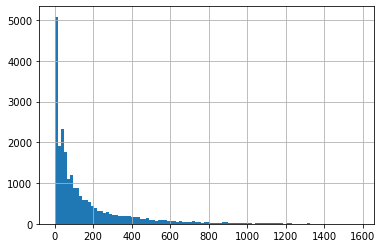

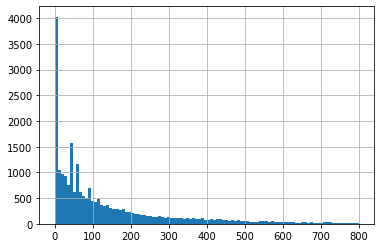

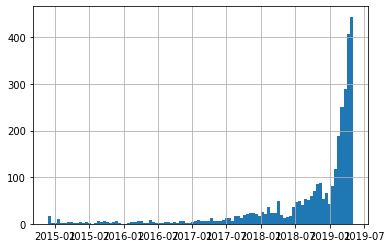

In [23]:
# print(data.head())

# Важно: мы сделали пустые значения нулем, поэтому будет логично проверить с учетом этих значений и без них


print(data['days_exposition'].describe())
# при среднем 150 дней (5 месяцев в продаж!) 50% сделок закрывается за 2,5 месяца (74 дня), это говорит о больших выбросах (сам максимум 1580 дней ~ 4,5 года)
data['days_exposition'].hist(bins=100)
plt.show()
# видно, что большая часть закрывается до 400 дней, после 800 уже достаточно мало объектов. Посмотрим ближе
data['days_exposition'].hist(bins=100, range = (0, 800))
plt.show()
# Видно, что при нашей замене на ноль статистика сбивается, надо убрать их. Главный маяк: количество не уменьшается мягко, а резко падает.

#построим график с времени выкладки объявления с нулевым значением дней
data[data['days_exposition'] == 0]['first_day_exposition'].hist(bins=100)
# график похож на обратный графику дней выставленно, скорее всего эти объявления просто не продались на момент "записи" данных

Оказывается квартиры все же продаются не за день, поэтому гипотезу считаем неверной и проведем ту же аналитику, но без учёта нулей

Неожиданный вывод: строчки с пустым значением дней вероятно еще не продались

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


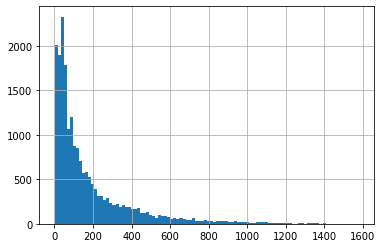

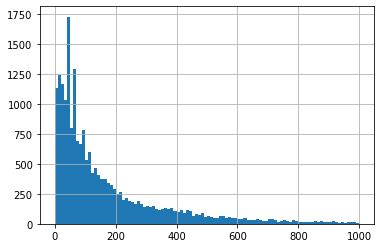

                         count        mean
days_exposition_group_q                   
(0.999, 9.0]              1130    5.952212
(9.0, 17.0]                988   13.409919
(17.0, 26.0]              1054   21.739089
(26.0, 35.0]              1046   30.830784
(35.0, 45.0]              1755   42.673504
(45.0, 48.0]               246   46.947154
(48.0, 60.0]              1409   56.495387
(60.0, 67.0]               608   63.870066
(67.0, 82.0]              1018   74.678782
(82.0, 95.0]              1012   89.140316
(95.0, 114.0]             1065  104.917371
(114.0, 135.0]            1007  124.317776
(135.0, 160.0]            1006  147.447316
(160.0, 190.0]            1021  174.883448
(190.0, 232.0]            1052  210.357414
(232.0, 287.0]             999  259.532533
(287.0, 364.0]            1041  324.763689
(364.0, 460.0]            1014  409.069034
(460.0, 647.0]            1022  541.071429
(647.0, 1580.0]           1025  892.678049


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [24]:
#сохраняем отдельный датафрейм без нулей в дате
# print(data.info())
data_nonan_days = data[data['days_exposition'] != 0]
# print(data_nonan.info())

print(data_nonan_days['days_exposition'].describe())
# среднее число закрытия - полгода, однако 50% продаж закрывается за 3 месяца, 75% за 7,5 месяцев. Есть также и большие выбросы
data_nonan_days['days_exposition'].hist(bins=100)
plt.show()
# Видна закономерность чем быстрее, тем больше закрытий, однако и есть пики. Посмотрим ближе (после 1000 почт не закрытий)
data_nonan_days['days_exposition'].hist(bins=100, range = (0, 1000))
plt.show()
# при корзине в 10 дней хорошо видны всплески на 40-50 дней, 60-70, 90-100, 110-120 - вероятно это связано с "пакетной" оплатой длительности выкладывания объявлений на сервисе

# а это подсмотрел у наставника :)
data_nonan_days['days_exposition_group_q'] = pd.qcut(data_nonan_days['days_exposition'],20)
print(data_nonan_days.groupby('days_exposition_group_q')['days_exposition'].agg(['count', 'mean']))
                                                                          

Согласно данным (не учитывая пустые значения в расчётах), быстрое время продажи - это полтора месяца - так закрывается 25% сделок. От 1,5 месяца до 7,5 продаже еще 50% клиентов. Остальные 10% продают до 1 года, а оставшиеся 15% вплоть до 4 лет. Поэтому если продажа не закрылась за год - надо бить тревогу :)

Из необычного:
- Клиенты судя по всему покупают пакеты размещения, потому что частотность уменьшается не плавно, а с резкими пиками (покупают размещение на ~45, ~60, ~90 дней и тп
- Пустые значения не говорят об продаже в тот же день, а скорее всего говорят, что объекты еще не были проданы на момент записи данных.

#### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64
Коэффициент корреляции стоимости к размеру квартиры: 0.6536750579657244


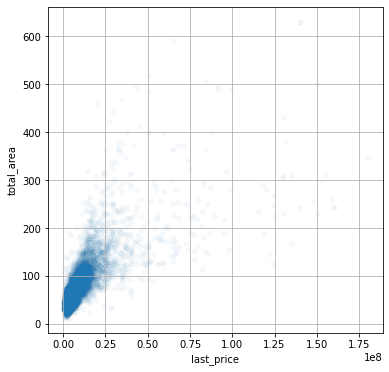

Коэффициент корреляции стоимости к числу комнат: 0.36334284996489546


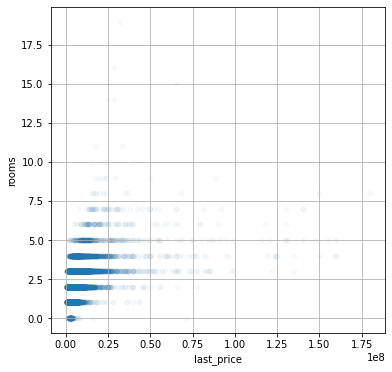

Коэффициент корреляции стоимости к этажам: 0.0265756432844708


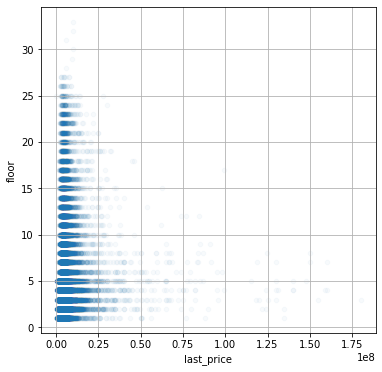

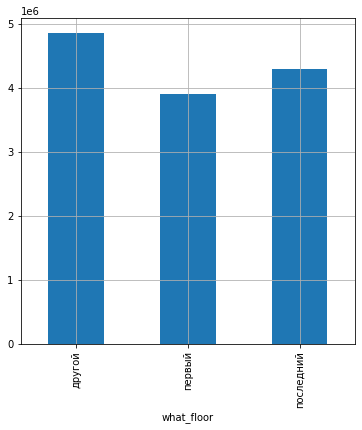

Коэффициент корреляции стоимости к размеру квартиры: -0.20674734874298376


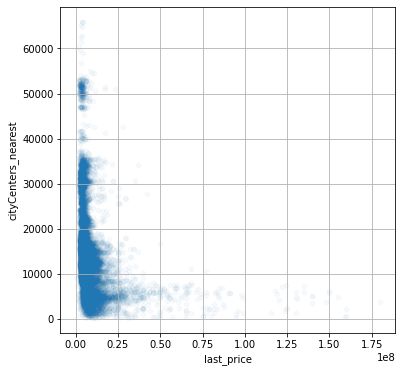

In [25]:
# data.info()

print(data['last_price'].describe())
# переменная с большими выбросами, будем её "резать" для нормального прочтения графиков

# Стоимость к размеру (квадратным метрам)
print('Коэффициент корреляции стоимости к размеру квартиры:', data['last_price'].corr(data['total_area']))
data[data['last_price'] < 0.25 * data['last_price'].max()].plot(x = 'last_price', y = 'total_area', kind = 'scatter', grid=True, alpha=0.03, figsize=(6,6))
plt.show()

# Стоимость к числу комнат
print('Коэффициент корреляции стоимости к числу комнат:', data['last_price'].corr(data['rooms']))
data[data['last_price'] < 0.25 * data['last_price'].max()].plot(x = 'last_price', y = 'rooms', kind = 'scatter', grid=True, alpha=0.03, figsize=(6,6))
plt.show()

# Стоимость к этажам в целом
print('Коэффициент корреляции стоимости к этажам:', data['last_price'].corr(data['floor']))
data[data['last_price'] < 0.25 * data['last_price'].max()].plot(x = 'last_price', y = 'floor', kind = 'scatter', grid=True, alpha=0.03, figsize=(6,6))
plt.show()

# Стоимость к категориям этажей
data.query('what_floor != "ошибка"').groupby('what_floor')['last_price'].median().plot(kind = 'bar', ylim = 0, grid=True, figsize=(6,6))
plt.show()

# Стоимость к удаленности от центра. Важно убрать нулевые значения!
print('Коэффициент корреляции стоимости к размеру квартиры:', data['last_price'].corr(data[data['cityCenters_nearest'] > 0]['cityCenters_nearest']))
data[data['last_price'] < 0.25 * data['last_price'].max()].query('cityCenters_nearest > 0').plot(x = 'last_price', y = 'cityCenters_nearest', kind = 'scatter', grid=True, alpha=0.03, figsize=(6,6))
plt.show()

- размер квартиры весьма сильно влияет на стоимость (коэффициент корреляции 0,68 и видно на графике)
- количество комнат влияет на стоимость средне (коэффициент корреляции 0,36 и видно на графике). Однако есть дорогие объекты и с небольшим количеством комнат
- этаж почти не влияет на стоимость квартиры (коэффициент корреляции 0,02), однако на графике видно, что дорогие объекты по большей части на невысоких этажах ~ до 10
- категория этаже влияет на стоимость: наиболее дешевые квартиры на первом этаже, дальше последний и самые дорогие между ними.
- расстояние до центра отрицательно и слабо влияет на стоимость (коэффициент корреляции -0,2), на графике особенно видно, что все дорогие предложения находятся до 10 000 от центра!

Изучите зависимость от даты размещения: дня недели, месяца и года.

Коэффициент корреляции стоимости к дню недели: 0.0015501452176215431


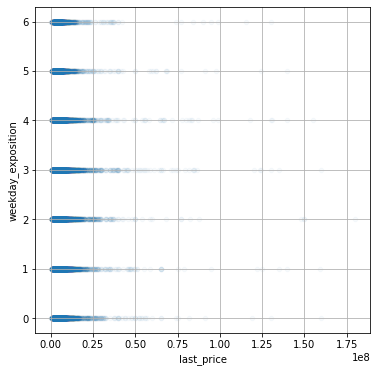

Коэффициент корреляции стоимости к дню месяца: 0.00917150529824089


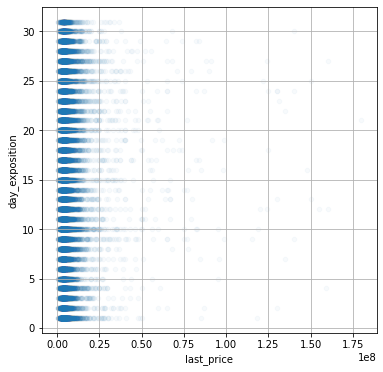

Коэффициент корреляции стоимости к месяцу: 0.0027791287507397252


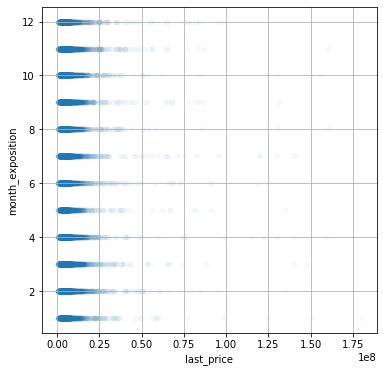

Коэффициент корреляции стоимости к году: -0.04308903619950858


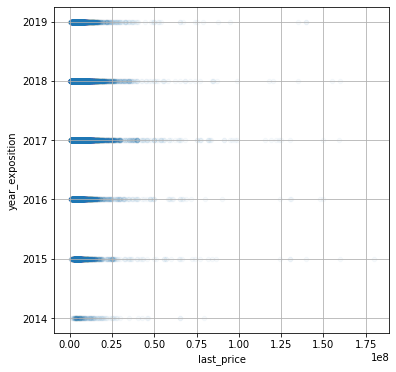

In [26]:
# data.info()

#считаем новый столбец день недели
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday 

# Стоимость к дню недели
print('Коэффициент корреляции стоимости к дню недели:', data['last_price'].corr(data['weekday_exposition']))
data[data['last_price'] < 0.25 * data['last_price'].max()].plot(x = 'last_price', y = 'weekday_exposition', kind = 'scatter', grid=True, alpha=0.03, figsize=(6,6))
plt.show()

# Стоимость к дню
print('Коэффициент корреляции стоимости к дню месяца:', data['last_price'].corr(data['day_exposition']))
data[data['last_price'] < 0.25 * data['last_price'].max()].plot(x = 'last_price', y = 'day_exposition', kind = 'scatter', grid=True, alpha=0.03, figsize=(6,6))
plt.show()

# Стоимость к месяцу
print('Коэффициент корреляции стоимости к месяцу:', data['last_price'].corr(data['month_exposition']))
data[data['last_price'] < 0.25 * data['last_price'].max()].plot(x = 'last_price', y = 'month_exposition', kind = 'scatter', grid=True, alpha=0.03, figsize=(6,6))
plt.show()

# Стоимость к году
print('Коэффициент корреляции стоимости к году:', data['last_price'].corr(data['year_exposition']))
data[data['last_price'] < 0.25 * data['last_price'].max()].plot(x = 'last_price', y = 'year_exposition', kind = 'scatter', grid=True, alpha=0.03, figsize=(6,6))
plt.show()

- Как видно по коэффициенту корреляции и графикам у дней недели и месяца, у месяцев и годов нет корреляции

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'

In [27]:
# data.info()
# Создаем топ 10 населенных пунктов
top_location = data.pivot_table(index = 'locality_name', values = 'price_m2', aggfunc = ('count', 'median', 'mean'))
print(top_location.sort_values(by='count',ascending=False).head(10))

                   count           mean         median
locality_name                                         
Санкт-Петербург    15721  114849.008794  104761.904762
посёлок Мурино       522   85752.189195   85878.462169
посёлок Шушары       440   78677.364217   76876.172608
Всеволожск           398   68654.473986   65789.473684
Пушкин               369  103125.819291  100000.000000
Колпино              338   75424.579098   74723.748474
посёлок Парголово    327   90175.913458   91642.857143
Гатчина              307   68746.146763   67796.610169
деревня Кудрово      299   92473.547576   91860.465116
Выборг               237   58141.909153   58158.319871


- Дороже всего жильё в Санкт-Петербурге (и по средней и по медиане)
- Дешевле всего из списка топ-10 в Выборге (средняя даже почти равна медиане, что значит нет выбросов)

#### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


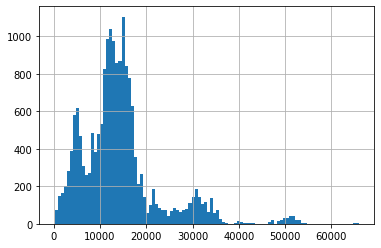

count    15660.000000
mean     11601.291571
std       4842.035279
min        181.000000
25%       8327.000000
50%      12244.500000
75%      14943.000000
max      29493.000000
Name: cityCenters_nearest, dtype: float64


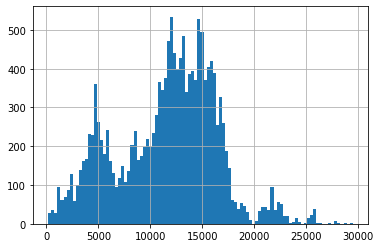

In [28]:
# data.info()

# Отфильтруем строки без пропусков/нулей 
data_cityCenters = data[data['cityCenters_nearest'] > 0]
print(data_cityCenters['cityCenters_nearest'].describe())
data_cityCenters['cityCenters_nearest'].hist(bins=100)
plt.show()
# Средняя выше медианы, но не сильно. У переменной есть несколько пиков (вероятно это уйдет при применению к городу)

data_cityCenters_spb = data[(data['cityCenters_nearest'] > 0) & (data['locality_name'] == 'Санкт-Петербург')]
print(data_cityCenters_spb['cityCenters_nearest'].describe())
data_cityCenters_spb['cityCenters_nearest'].hist(bins=100)
plt.show()
# Множественные пики данных не ушли, но в целом расстояние стало куда меньше по среднему и размаху (все же объекты часть города)

count    15660.000000
mean        11.103895
std          4.841942
min          0.000000
25%          8.000000
50%         12.000000
75%         14.000000
max         29.000000
Name: Center_km, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


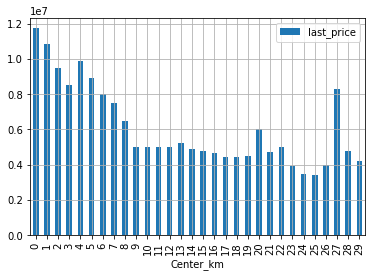

In [29]:
data_cityCenters_spb['Center_km'] = data_cityCenters_spb['cityCenters_nearest'] / 1000
data_cityCenters_spb['Center_km'] = data_cityCenters_spb['Center_km'].astype('int')
print(data_cityCenters_spb['Center_km'].describe())

spb_km_pivot = data_cityCenters_spb.pivot_table(index='Center_km', values = 'last_price', aggfunc = 'median')
spb_km_pivot.plot(kind = 'bar', grid=True)

- Видно, что есть несколько пиков дороговизны жилья, но очевидно на 9 километре цена резко переходит в плато, а это значит ограничем центр до 8 километров включительно.

#### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
count    4382.000000
mean       88.570032
std        57.929565
min        12.000000
25%        53.225000
50%        75.000000
75%       104.840000
max       900.000000
Name: total_area, dtype: float64


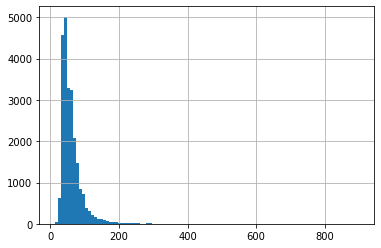

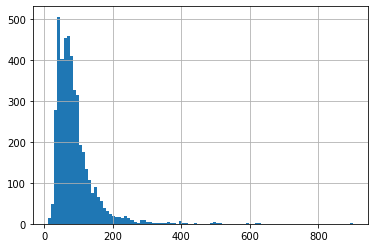

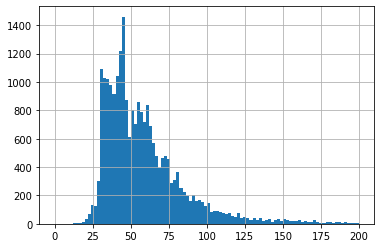

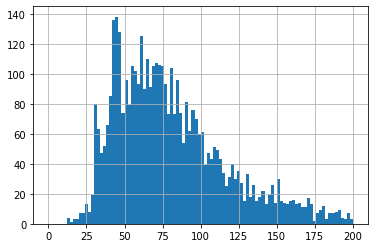

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64
count    4.382000e+03
mean     1.376875e+07
std      2.296136e+07
min      1.600000e+06
25%      6.207104e+06
50%      8.707500e+06
75%      1.350000e+07
max      7.630000e+08
Name: last_price, dtype: float64


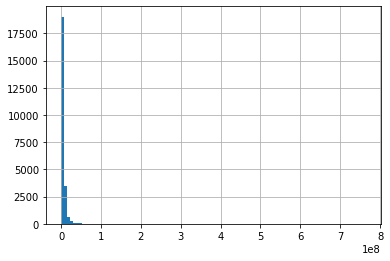

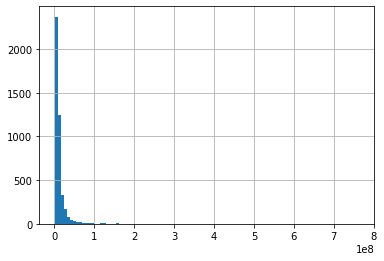

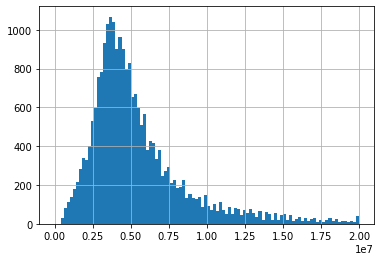

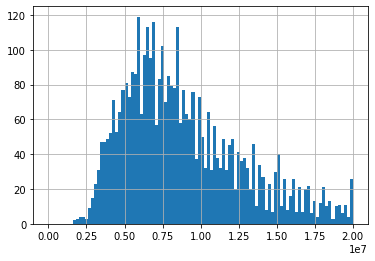

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
count    4382.000000
mean        2.720904
std         1.410307
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64


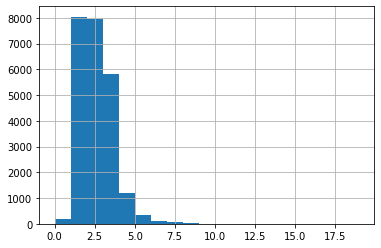

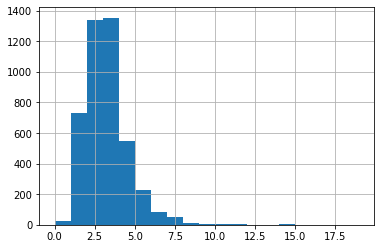

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
count    2867.000000
mean        3.110296
std         2.056766
min         2.000000
25%         2.800000
50%         3.000000
75%         3.200000
max       100.000000
Name: ceiling_height, dtype: float64


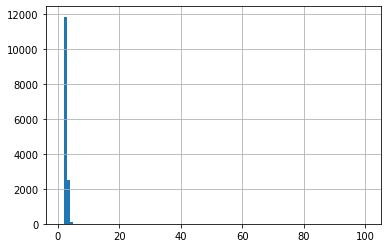

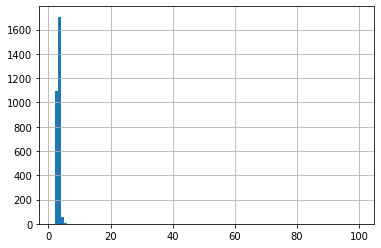

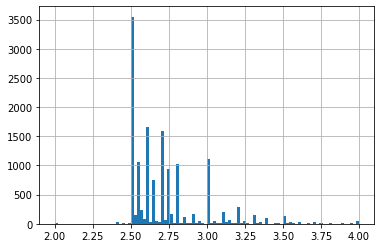

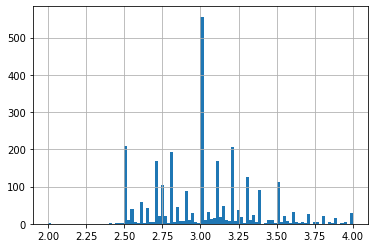

In [30]:
# data.info()

# Выделим сегмент квартир в центре
data_centr = data_cityCenters_spb.query('Center_km <= 8')

print(data['total_area'].describe())
print(data_centr['total_area'].describe())
# общие показатели (средняя, медиана, квартили) говорят о том что квартиры в Санкт-Петербурге больше, чем в среднем по выборке
data['total_area'].hist(bins=100)
plt.show()
data_centr['total_area'].hist(bins=100)
plt.show()
# Графики похожи, но не идентичны. Взглянем ближе
data['total_area'].hist(bins=100, range=(0,200))
plt.show()
data_centr['total_area'].hist(bins=100, range=(0,200))
plt.show()
# На графиках видно, что в Санкт-петербурге "колокол" более стабильный, выбор квартир больше 50 метров гораздо шире!

print(data['last_price'].describe())
print(data_centr['last_price'].describe())
# Цены в Санкт-Петербурге больше общей выборки в два раза (средние, медианы)
data['last_price'].hist(bins=100)
plt.show()
data_centr['last_price'].hist(bins=100)
plt.show()
# Общий график также не читабелен из-за очень дорогой квартиры. Построим более подробный отчёт до 20 миллионов
data['last_price'].hist(bins=100, range=(0,20000000))
plt.show()
data_centr['last_price'].hist(bins=100, range=(0,20000000))
plt.show()
# На подробных графиках также заметно как распределение смещено в сторону дорогих квартир

print(data['rooms'].describe())
print(data_centr['rooms'].describe())
# В сравнении опять заметно изменение, в Санкт-Петербурге на "одну" комнату больше в среднем.
data['rooms'].hist(bins=19)
plt.show()
data_centr['rooms'].hist(bins=19)
plt.show()
# Больше всего в Санкт-Петербурге 3-комнатных и 2-комнатных. 1-комнатных гораздо меньше относительно общей совокупности,4-комнатные почти догоняют "однушки".

print(data['ceiling_height'].describe())
print(data_centr['ceiling_height'].describe())
# Высота потолков в Санкт-Петербурге тоже выше, чем в целом почти на полметра!
data['ceiling_height'].hist(bins=100)
plt.show()
data_centr['ceiling_height'].hist(bins=100)
plt.show()
# график также непонятен ввиду выброса, построим меньшие графики
data['ceiling_height'].hist(bins=100, range=(2,4))
plt.show()
data_centr['ceiling_height'].hist(bins=100, range=(2,4))
plt.show()
# На подробных графиках очень заметно, что основная высота потолков в квартирах Санкт-Петербурга - это 3 метра!

Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64
Коэффициент корреляции стоимости к размеру квартиры: 0.6410435202809481


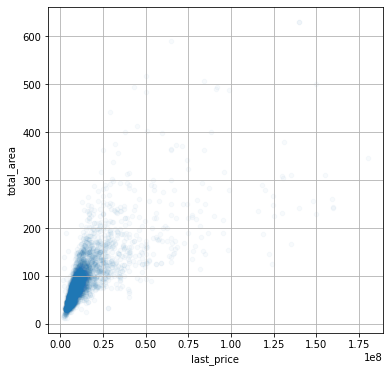

Коэффициент корреляции стоимости к размеру квартиры: 0.34509000946346535


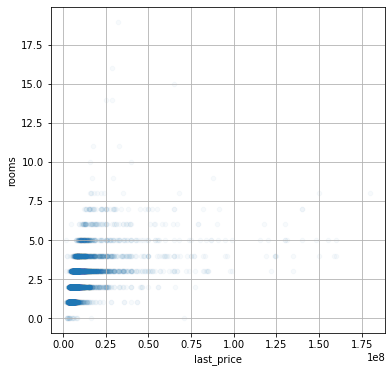

Коэффициент корреляции стоимости к размеру квартиры: 0.10671000713938157


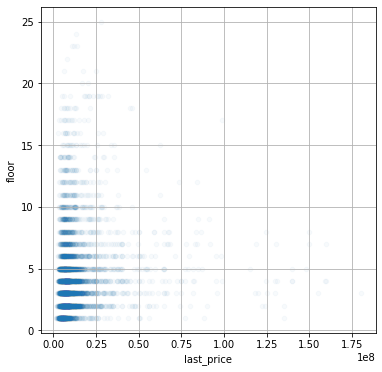

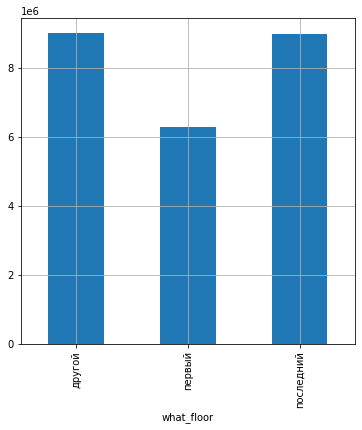

Коэффициент корреляции стоимости к размеру квартиры: -0.10029052127850331


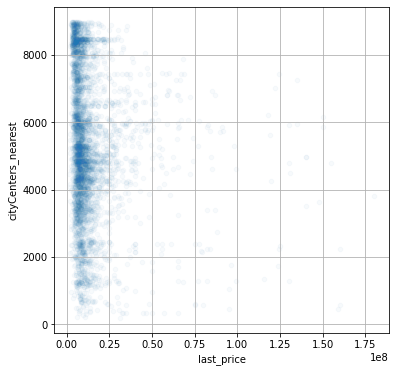

In [31]:
print(data['last_price'].describe())
# переменная с большими выбросами, поэтому будем также резать. Как и ожидалась самая дорогая квартира в Санкт-Петербурге находится

# Стоимость к размеру (квадратным метрам)
print('Коэффициент корреляции стоимости к размеру квартиры:', data_centr['last_price'].corr(data_centr['total_area']))
data_centr[data_centr['last_price'] < 0.25 * data_centr['last_price'].max()].plot(x = 'last_price', y = 'total_area', kind = 'scatter', grid=True, alpha=0.03, figsize=(6,6))
plt.show()

# # Стоимость к числу комнат rooms
print('Коэффициент корреляции стоимости к размеру квартиры:', data_centr['last_price'].corr(data_centr['rooms']))
data_centr[data_centr['last_price'] < 0.25 * data_centr['last_price'].max()].plot(x = 'last_price', y = 'rooms', kind = 'scatter', grid=True, alpha=0.03, figsize=(6,6))
plt.show()

# # Стоимость к этажам floor
print('Коэффициент корреляции стоимости к размеру квартиры:', data_centr['last_price'].corr(data_centr['floor']))
data_centr[data_centr['last_price'] < 0.25 * data_centr['last_price'].max()].plot(x = 'last_price', y = 'floor', kind = 'scatter', grid=True, alpha=0.03, figsize=(6,6))
plt.show()

# Стоимость к категориям этажей
data_centr.query('what_floor != "ошибка"').groupby('what_floor')['last_price'].median().plot(kind = 'bar', ylim = 0, grid=True, figsize=(6,6))
plt.show()

# # Стоимость к удаленности от центра. 
print('Коэффициент корреляции стоимости к размеру квартиры:', data_centr['last_price'].corr(data_centr['cityCenters_nearest']))
data_centr[data_centr['last_price'] < 0.25 * data_centr['last_price'].max()].plot(x = 'last_price', y = 'cityCenters_nearest', kind = 'scatter', grid=True, alpha=0.03, figsize=(6,6))
plt.show()

- размер квартиры сильно влияет на стоимость (коэффициент корреляции 0,68 и видно на графике). Такое же соответствие как и в общем выводе.
- количество комнат влияет на стоимость средне (коэффициент корреляции 0,34 и видно на графике). Такое же соответствие как и в общем выводе.
- этаж слабо влияет на стоимость квартиры (коэффициент корреляции 0,1), однако на графике видно, что дорогие объекты по большей части на невысоких этажах ~ до 10. Влияние чуть сильнее, чем в общем
- Первые этажи в Санкт-Петербурге также гораздо дешевле, чем другие, однако последние равны "Другим" в отличии от общей выборки.
- расстояние до центра отрицательно и слабо влияет на стоимость (коэффициент корреляции -0,1). Влияние слабее, чем в среднем (все же квартиры в Санкт-Петербурге сами по себе стоят дороже. 

Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Квартиры в Санкт-Петербурге дороже, больше по метражу, по числу комнат и по высоте потолков. Влияние параметров на стоимость приблизительно такое же (Размер больше всего, комнаты меньши, этаж и расстояние до центра слабо по количеству комнат

### Шаг 5. Общий вывод

Изначальна дана таблица с данными сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Исследование было направлено на нахождения способа определять рыночную стоимость объектов.

<b>Шаг 1.</b> 
- Корректно прочитали данные (с необычным разделителем) и описали данные.

<b>Шаг 2.</b>
- По возможности заполнили пустые строки в переменных (часть не меняли и пометили на повторное изучение при создании выводов)  и сменили типы данных на более подходящие (временной, булев и целочисленные)

<b>Шаг 3.</b>
- Добавили необходимые переменные: цена квадратного метра; день, месяц, год публикации объявления; категории этажей и соотношения жилой и кухонной площади

<b>Шаг 4.</b>

Изучены параметры: площадь, цена, число комнат и высота потолков:
- Медианная площадь равна 52 метрам, средняя чуть выше медианы (60), при этом есть очень большие предложения (900 метров) и крохотные (больше 12 метров).
- Медиана стоимости - это 4,6 миллиона, средняя сильно выше - 6,5 миллионов (почти как третий квартиль).
- Медианное значение 2 комнаты, средняя почти такая же. В абсолютных цифрах больше всего однокомнатых квартир и чуть меньше 2-комнатных 3-комнатных на четверть меньше и дальше уже совсем мало вариантов
- Высота потолков - это весьма стандартизированная переменная с пиками в конкретных значенениях (стандартах) с провалами между ними. Средняя высота потолка 2,7 метра, медианная 2,65 метра Хотя конечно есть выбросы: 1 метровый потолок и 100 метровый

Изучено время продажи квартиры:
- Быстрое время продажи - это полтора месяца - так закрывается 25% сделок. От 1,5 месяца до 7,5 продаже еще 50% клиентов. Остальные 10% продают до 1 года, а оставшиеся 15% вплоть до 4 лет. Поэтому если продажа не закрылась за год - надо бить тревогу :)
- Клиенты судя по всему покупают пакеты размещения, потому что частотность уменьшается не плавно, а с резкими пиками (покупают размещение на ~45, ~60, ~90 дней и тп
- Пустые значения не говорят об продаже в тот же день, а скорее всего говорят, что объекты еще не были проданы на момент записи данных.

Изучены факторы влияния на стоимость квартиры:
- размер квартиры весьма сильно влияет на стоимость 
- количество комнат влияет на стоимость средне. Однако есть дорогие объекты и с небольшим количеством комнат.
- этаж почти не влияет на стоимость квартиры. Однако дорогие объекты по большей части на невысоких этажах ~ до 10.
- категория этажа влияет на стоимость: наиболее дешевые квартиры на первом этаже, дальше последний и самые дорогие между ними.
- расстояние до центра отрицательно и слабо влияет на стоимость на графике особенно видно, что все дорогие предложения находятся до 10 000 м от центра!
- У дней недели и месяца, у месяцев и годов нет корреляции с ценой.
- Дороже всего жильё в Санкт-Петербурге 
- Дешевле всего из списка топ-10 по количеству предложений в Выборге

Определен размер центра Санкт-Петербурга:
- исходя из стоимости квартир ограничили центр до 8 километров включительно.

Изучены предложения в Санкт-Петербурге относительно общей выборки:
- Размер квартир также сильно влияет на стоимость.
- Количество комнат также средне влияет на стоимость.
- Этаж слабо влияет на стоимость, но чуть сильнее, чем в общем.
- Первые этажи также дешевле, чем другие, а вот последние равны по стоимости 
- расстояние до центра отрицательно и слабо влияет на стоимость (коэффициент корреляции -0,1). Влияние слабее, чем в среднем (все же квартиры в Санкт-Петербурге сами по себе стоят дороже). Однако отсутствие линейной зависимости не говорит об отсутствии зависимости в целом. Самые дорогие квартиры все же ближе к центру Санкт-Петербурга 